<a href="https://colab.research.google.com/github/Omprakash977/Restaurant-Clustering-/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# **Importing libraries and reading the datasets**

In [142]:
# Importing the libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from prettytable import PrettyTable 

import nltk
import string
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn import svm

from sklearn.metrics import classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [140]:
# Mounting google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [141]:
# Importing the datasets
df1 = pd.read_csv('/content/drive/MyDrive/Datasets/Zomato Restaurant names and Metadata.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Datasets/Zomato Restaurant reviews.csv')

# **Inspecting the "Zomato Restaurant names and Metadata" dataset**

In [4]:
# First five rows of the dataset
df1.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
# Last five rows of the dataset
df1.tail()

,Name,Links,Cost,Collections,Cuisines,Timings
100,IndiBlaze,https://www.zomato.com/hyderabad/indiblaze-gac...,600,NaN,"Fast Food, Salad",11 AM to 11 PM
101,Sweet Basket,https://www.zomato.com/hyderabad/sweet-basket-...,200,NaN,"Bakery, Mithai","10 AM to 10 PM (Mon-Thu), 8 AM to 10:30 PM (Fr..."
102,Angaara Counts 3,https://www.zomato.com/hyderabad/angaara-count...,500,NaN,"North Indian, Biryani, Chinese",12 Noon to 11 PM
103,Wich Please,https://www.zomato.com/hyderabad/wich-please-1...,250,NaN,Fast Food,8am to 12:30AM (Mon-Sun)
104,Republic Of Noodles - Lemon Tree Hotel,https://www.zomato.com/hyderabad/republic-of-n...,"1,700",Pan-Asian Delicacies,"Thai, Asian, Chinese, Malaysian","11:30 AM to 3 PM, 7 PM to 12 Midnight"


In [6]:
# Shape of the dataset
df1.shape

(105, 6)

The dataset consists of the data of 105 restaurants, which is represented by 6 columns including the name of the restaurant.

In [7]:
# Data type of each column
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


Here the cost column needs to be of datatype int or float.

In [8]:
# Changing data type of cost column from object to integer
df1['Cost'] = df1['Cost'].str.replace("," , "").astype('int64')

In [9]:
# finding statistical measures of numerical column
df1.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


In [10]:
# Checking skewness of cost column
df1.skew()

Cost    1.14345
dtype: float64

Here the distribution of cost column is positively skewed. It can also be visualized using dist plot.

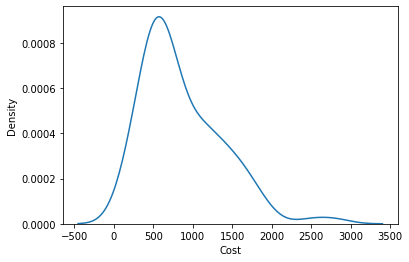

In [11]:
# Creating dist plot of cost column
sns.distplot(df1['Cost'], hist = False)
plt.show()

In [12]:
# Checking null value count of each column
df1.isnull().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

There are null values in "Collections" and "Timings" columns. As there columns are of type object we can replace these null values with a string.

In [13]:
# Filling null values with 'Unknown'
df1.fillna('Unknown', inplace = True)

In [14]:
# Checking for any dulicate rows
df1[df1.duplicated()].sum()

Name           0.0
Links          0.0
Cost           0.0
Collections    0.0
Cuisines       0.0
Timings        0.0
dtype: float64

There are no duplicate rows. 

**Now we can proceed towards the exploratory data analysis part where we will find some insights from the dataset.**

## EDA on "Zomato Restaurant names and Metadata" dataset

In [15]:
cuisine_list = df1['Cuisines'].str.split(', ')         # Separating all the cuisines by spliting the column by comma.
restaurants = {}                                       # Creating an empty dictionary which will store the cuisine name as key and count of restaurant as value
for i in cuisine_list:                                 # Iterating through each index
  for j in i:                                          # Iterating inside a particular index
    if (j in restaurants):
      restaurants[j] += 1
    else:
      restaurants[j] = 1

In [16]:
X = pd.DataFrame(restaurants.values(),index = restaurants.keys(), columns = {'Number_of_Restaurants'})  # Converting the above dictionary to dataframe
X.sort_values(by = 'Number_of_Restaurants',ascending = False,inplace = True)                 # Sorting the df by descending order to get most available cusines at top
X = X.head(10)  # fetching the top 10 cuisines

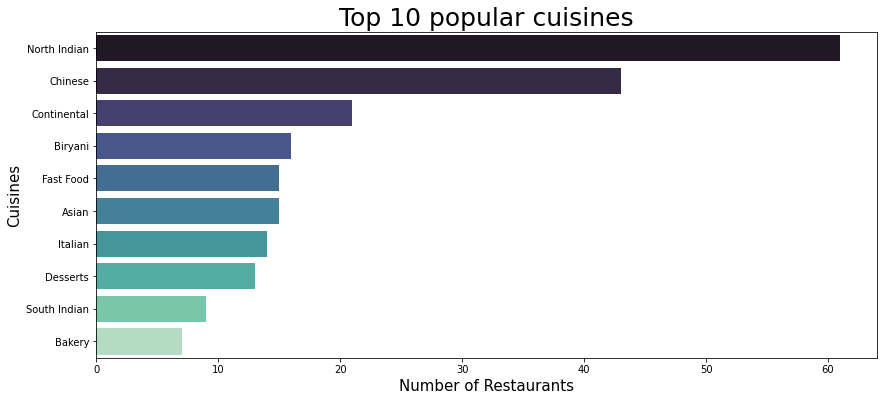

In [17]:
# Plotting the above result
plt.figure(figsize = (14, 6))
sns.barplot(x = 'Number_of_Restaurants', y = X.index,  data = X, palette = "mako")
plt.title("Top 10 popular cuisines", size = 25)
plt.xlabel("Number of Restaurants", size = 15)
plt.ylabel("Cuisines", size = 15)
plt.show()

"North Indian" cuisine is the most popular cuisine which is available in more than 50% of restaurants.

"Chinese" cuisine is the 2nd most available cuisine.

In [18]:
collection_list = df1['Collections'].str.split(', ')  # Separating all the cuisines by spliting the column by comma.
rest = {}                                             # Creating an empty dictionary which will store the collection name as key and count of restaurant as value
for i in collection_list:                             # Iterating through each index
  for j in i:                                         # Iterating inside a particular index
    if (j in rest):
      rest[j] += 1
    else:
      rest[j] = 1

In [19]:
Y = pd.DataFrame(rest.values(),index = rest.keys(), columns = {'Number_of_Restaurants'})  # Converting the above dictionary to dataframe
Y.sort_values(by = 'Number_of_Restaurants',ascending = False,inplace = True)     # Sorting the df by descending order to get most available collection at top
Y = Y[1:11]

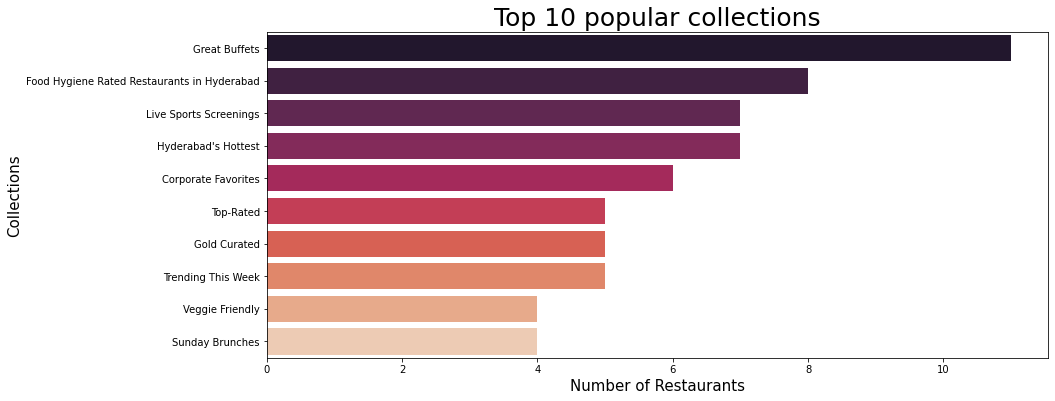

In [20]:
# Plotting the above result
plt.figure(figsize = (14, 6))
sns.barplot(x = 'Number_of_Restaurants', y = Y.index,  data = Y, palette = "rocket")
plt.title("Top 10 popular collections", size = 25)
plt.xlabel("Number of Restaurants", size = 15)
plt.ylabel("Collections", size = 15)
plt.show()

In [21]:
# Creating a new dataframe which is sorted by cost.
rest_cost = df1.sort_values(by = 'Cost',ascending = False)

In [22]:
# Top 10 most expensive restaurants
rest_cost[['Name','Cuisines','Cost']][0:10]

,Name,Cuisines,Cost
92,Collage - Hyatt Hyderabad Gachibowli,"Continental, Italian, North Indian, Chinese, A...",2800
56,Feast - Sheraton Hyderabad Hotel,"Modern Indian, Asian, Continental, Italian",2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,"North Indian, Japanese, Italian, Salad, Sushi",1900
18,10 Downing Street,"North Indian, Chinese, Continental",1900
91,Cascade - Radisson Hyderabad Hitec City,"North Indian, Italian, Continental, Asian",1800
97,Zega - Sheraton Hyderabad Hotel,"Asian, Sushi",1750
104,Republic Of Noodles - Lemon Tree Hotel,"Thai, Asian, Chinese, Malaysian",1700
34,Mazzo - Marriott Executive Apartments,"Italian, North Indian, South Indian, Asian",1700
90,Arena Eleven,Continental,1600
11,Barbeque Nation,"Mediterranean, North Indian, Kebab, BBQ",1600


In [23]:
# Top 10 cheapest restaurants
rest_cost[['Name','Cuisines','Cost']].tail(10).sort_values(by = 'Cost', ascending = True)

,Name,Cuisines,Cost
89,Mohammedia Shawarma,"Street Food, Arabian",150
23,Amul,"Ice Cream, Desserts",150
54,Asian Meal Box,Asian,200
59,KS Bakers,"Bakery, Desserts, Fast Food",200
85,Momos Delight,Momos,200
29,Hunger Maggi Point,Fast Food,200
101,Sweet Basket,"Bakery, Mithai",200
103,Wich Please,Fast Food,250
7,Shah Ghouse Spl Shawarma,Lebanese,300
9,Cream Stone,"Ice Cream, Desserts",350


# **Inspecting the "Zomato Restaurant reviews" dataset**

In [24]:
# First five rows of the dataset
df2.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [25]:
# Last five rows of the dataset
df2.tail()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
9995,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3,"53 Reviews , 54 Followers",6/5/2016 0:08,0
9996,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",6/4/2016 22:01,0
9997,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",6/3/2016 10:37,3
9998,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4,"13 Reviews , 144 Followers",5/31/2016 17:22,0
9999,Chinese Pavilion,Bhargava Krishna,Checked in here to try some delicious chinese ...,3.5,"472 Reviews , 1302 Followers",5/31/2016 16:41,6


In [26]:
# Shape of the dataset
df2.shape

(10000, 7)

There are total 10000 reviews for the 105 restaurants.

In [27]:
# Checking null value count of each column
df2.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

There are few null value in each column. Instead of filling those few null values, it's better to drop those rows.

In [28]:
# Dropping the null values
df2.dropna(inplace = True)

In [29]:
# column information
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  9955 non-null   object
 1   Reviewer    9955 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9955 non-null   object
 4   Metadata    9955 non-null   object
 5   Time        9955 non-null   object
 6   Pictures    9955 non-null   int64 
dtypes: int64(1), object(6)
memory usage: 622.2+ KB


Here we need to change the dtype of rating column from object to int/float. 

In [30]:
# Checking the values of rating column
df2['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

As there is a word 'Like' in the rating column, we can't convert the rating column dtype to integer/float. So to proceed further we have to remove/replace this word from the column.

In [31]:
# Replacing 'Like' word
df2['Rating'] = df2['Rating'].replace('Like', 5)

In [32]:
# Converting dtype of 'Rating' from object to float64. 
df2['Rating'] = df2['Rating'].astype('float64')

Now from the metadata column, we need to separate the reviews and followers. For this we will make 2 separate column to store those values.

In [33]:
df2['No_of_Reviews'],df2['No_of_Followers']=df2['Metadata'].str.split(',').str        # Splitting by comma.
df2['No_of_Reviews'] = pd.to_numeric(df2['No_of_Reviews'].str.split(' ').str[0])      # Splitting by space and fetching the zeroth index
df2['No_of_Followers'] = pd.to_numeric(df2['No_of_Followers'].str.split(' ').str[1])  # Splitting by space and fetching the first index

# Removing the 'Metadata' column
df2.drop(['Metadata'], axis = 1, inplace=True)

In [34]:
# Checking the final modified dataset
df2.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2.0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2.0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3.0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1.0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2.0


In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9955 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Restaurant       9955 non-null   object 
 1   Reviewer         9955 non-null   object 
 2   Review           9955 non-null   object 
 3   Rating           9955 non-null   float64
 4   Time             9955 non-null   object 
 5   Pictures         9955 non-null   int64  
 6   No_of_Reviews    9955 non-null   int64  
 7   No_of_Followers  8381 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 700.0+ KB


**Now we can proceed towards the exploratory data analysis part where we will find some insights from the dataset.**

## EDA on "Zomato Restaurant reviews" dataset

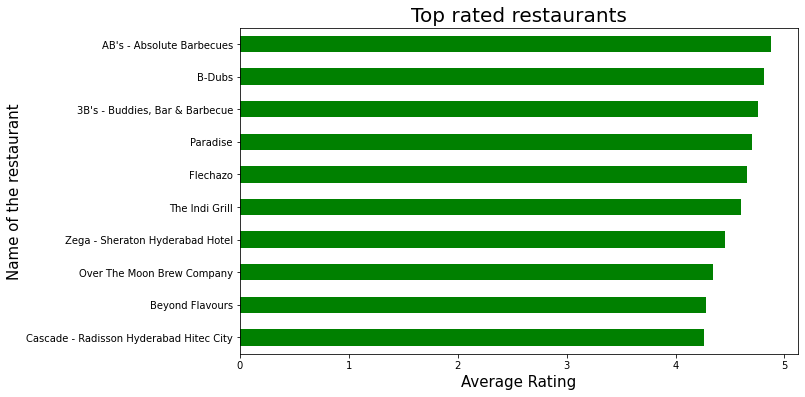

In [36]:
# Top rated restaurants
plt.figure(figsize=(10,6))
df2.groupby('Restaurant')['Rating'].mean().sort_values(ascending = False).head(10).plot.barh(color = 'g') # Finding the average rating of each restaurant.
plt.title("Top rated restaurants", fontsize=20)
plt.xlabel("Average Rating", fontsize=15)
plt.ylabel("Name of the restaurant", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

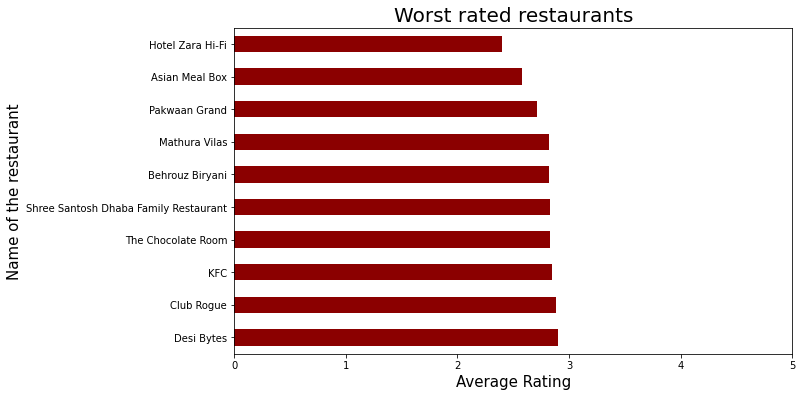

In [37]:
# Worst rated restaurants
plt.figure(figsize=(10,6))
df2.groupby('Restaurant')['Rating'].mean().sort_values().head(10).plot.barh(color = 'darkred')
plt.title("Worst rated restaurants", fontsize=20)
plt.xlabel("Average Rating", fontsize=15)
plt.ylabel("Name of the restaurant", fontsize=15)
plt.xlim([0, 5])
plt.gca().invert_yaxis()
plt.show()

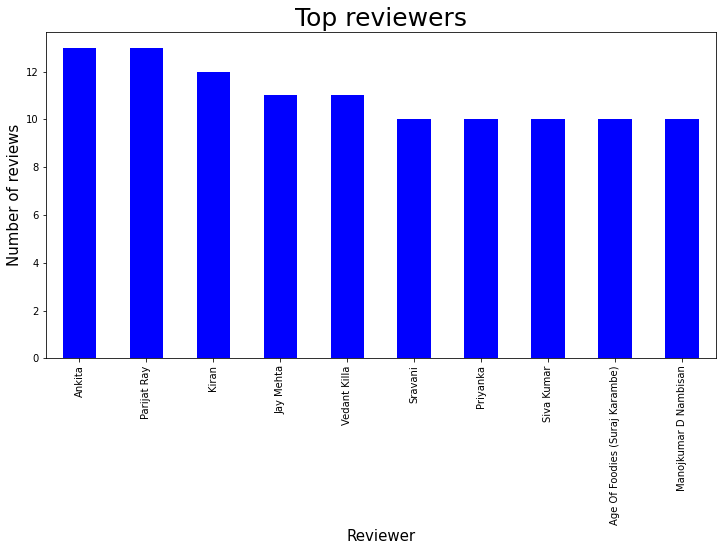

In [38]:
# Top reviewers
plt.figure(figsize=(12,6))
df2['Reviewer'].value_counts().sort_values(ascending = False).head(10).plot.bar(color = 'b')
plt.title("Top reviewers", fontsize=25)
plt.xlabel("Reviewer", fontsize=15)
plt.ylabel("Number of reviews", fontsize=15)
plt.show()

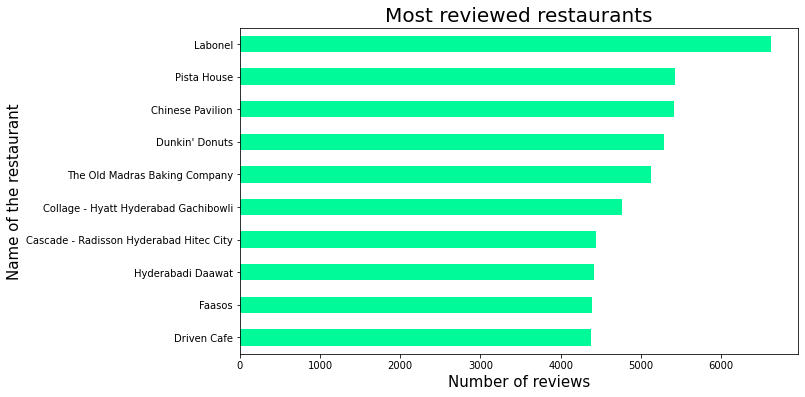

In [39]:
# Most reviewed restaurants
plt.figure(figsize=(10,6))
df2.groupby('Restaurant')['No_of_Reviews'].sum().sort_values(ascending = False).head(10).plot.barh(color = 'mediumspringgreen')
plt.title("Most reviewed restaurants", fontsize=20)
plt.xlabel("Number of reviews", fontsize=15)
plt.ylabel("Name of the restaurant", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

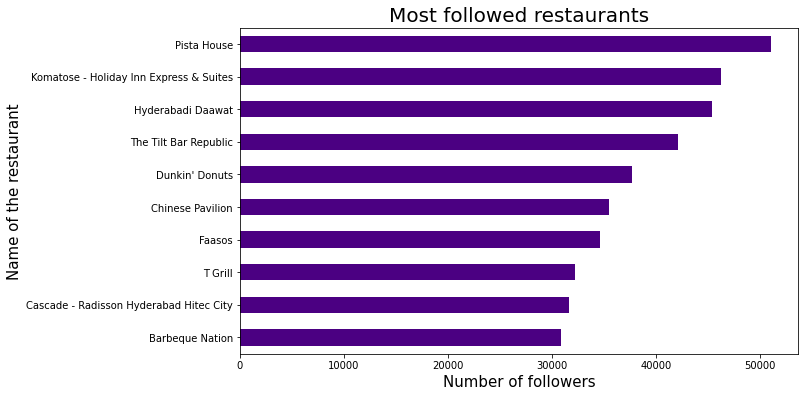

In [40]:
# Most followed restaurants
plt.figure(figsize=(10,6))
df2.groupby('Restaurant')['No_of_Followers'].sum().sort_values(ascending = False).head(10).plot.barh(color = 'indigo')
plt.title("Most followed restaurants", fontsize=20)
plt.xlabel("Number of followers", fontsize=15)
plt.ylabel("Name of the restaurant", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

# **Data preparation for clustering**

In [41]:
# Changing the column name which will help to merge both the datasets.
df2.rename(columns = {'Restaurant':'Name'}, inplace = True)

Now we need to aggregate the 'Rating', 'No_of_Reviews' and 'No_of_Followers' to make it a single value for each restaurant. For this we will take average of each column by grouping them restaurant name wise.

In [42]:
restaurants = list(df2['Name'].unique())
# Initializing three new columns
df2['Mean_Rating'] = 0        
df2['Mean_Reviews'] = 0
df2['Mean_Followers'] = 0

for i in range(len(restaurants)):
    df2['Mean_Rating'][df2['Name'] == restaurants[i]] = df2['Rating'][df2['Name'] == restaurants[i]].mean()
    df2['Mean_Reviews'][df2['Name'] == restaurants[i]] = df2['No_of_Reviews'][df2['Name'] == restaurants[i]].mean()
    df2['Mean_Followers'][df2['Name'] == restaurants[i]] = df2['No_of_Followers'][df2['Name'] == restaurants[i]].mean()

In [43]:
df2.head()

,Name,Reviewer,Review,Rating,Time,Pictures,No_of_Reviews,No_of_Followers,Mean_Rating,Mean_Reviews,Mean_Followers
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,5/25/2019 15:54,0,1,2.0,4.28,7.52,134.146667
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,5/25/2019 14:20,0,3,2.0,4.28,7.52,134.146667
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,5/24/2019 22:54,0,2,3.0,4.28,7.52,134.146667
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,5/24/2019 22:11,0,1,1.0,4.28,7.52,134.146667
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,5/24/2019 21:37,0,3,2.0,4.28,7.52,134.146667


In [44]:
# Ceaating a new dataframe by taking only the required columns for clustering
df_clust2 = df2[['Name', 'Mean_Rating',	'Mean_Followers']]

As there will be duplicate value in the newly formed dataset, we have to remove them.

In [45]:
df_clust2.drop_duplicates(inplace = True)

In [46]:
# Separating out the required columns from df1 for clustering
df_clust1 = df1[['Name', 'Cost']]

In [47]:
# Merging both the datasets
final_df = pd.merge(df_clust1, df_clust2, on = 'Name')

In [48]:
final_df.head()

,Name,Cost,Mean_Rating,Mean_Followers
0,Beyond Flavours,800,4.28,134.146667
1,Paradise,800,4.70,9.279070
2,Flechazo,1300,4.66,40.411765
3,Shah Ghouse Hotel & Restaurant,800,3.21,155.828947
4,Over The Moon Brew Company,1200,4.34,73.020833


In [49]:
final_df.describe()

,Cost,Mean_Rating,Mean_Followers
count,100.000000,100.000000,100.000000
mean,872.000000,3.602029,189.506495
std,505.940468,0.508106,121.469274
min,150.000000,2.400000,8.264706
25%,500.000000,3.245000,107.947510
50%,700.000000,3.615000,171.492348
75%,1200.000000,3.846250,246.510088
max,2800.000000,4.880000,573.797753


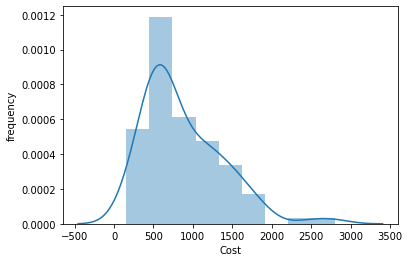

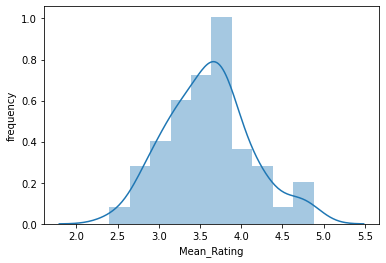

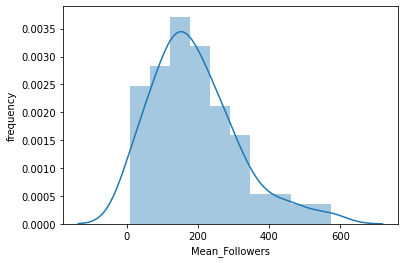

In [50]:
# Checking the distribution of all the columns
for var in final_df.describe().columns:
  sns.distplot(final_df[var].dropna())
  plt.ylabel('frequency')
  plt.xlabel(var)
  plt.show()

As the distribution of 'Cost' and 'Mean_Followers' are slightly right skewed, we will apply square root transformation on these columns to make it normally distributed.

In [51]:
# Applying square root transformation on 'Cost' and 'Mean_Followers' column
final_df['Cost'] = final_df['Cost']**0.5
final_df['Mean_Followers'] = final_df['Mean_Followers']**0.5

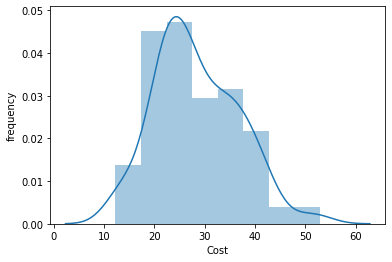

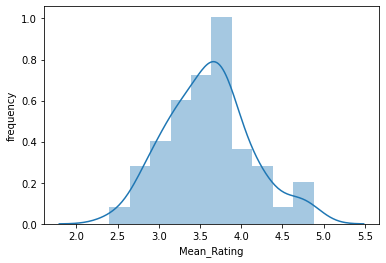

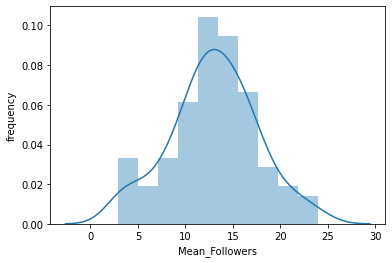

In [52]:
# Checking the distribution of all the columns
for var in final_df.describe().columns:
  sns.distplot(final_df[var].dropna())
  plt.ylabel('frequency')
  plt.xlabel(var)
  plt.show()

Now as all the features are nearly normally distributed we can proceed futher to cluster them together.

# **Clustering**

## Clustering by 'Cost' and 'Mean_Rating' 

**Feature scaling**

Feature Scaling is a technique of bringing down the values of all the independent features of the dataset on the same scale. Feature selection helps to do calculations in algorithms very quickly. It is the important stage of data preprocessing.

In [53]:
features_rec_mon=['Cost', 'Mean_Rating']
X_features_rec_mon = final_df[features_rec_mon].values
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

**Silhouette score**

Silhouette score is used to evaluate the quality of clusters created using clustering algorithms such as K-Means in terms of how well samples are clustered with other samples that are similar to each other. The Silhouette score is calculated for each sample of different clusters. The more is the Silhouette score, better the clusters are.

In [54]:
# Calculating silhouette score for a range of clusters
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state = 100)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.4208197635131864
For n_clusters = 3, silhouette score is 0.3786879927920481
For n_clusters = 4, silhouette score is 0.4366652722361556
For n_clusters = 5, silhouette score is 0.40328722072991224
For n_clusters = 6, silhouette score is 0.3683990379987426
For n_clusters = 7, silhouette score is 0.3499737486340058
For n_clusters = 8, silhouette score is 0.35612606238968725
For n_clusters = 9, silhouette score is 0.3670785712413619
For n_clusters = 10, silhouette score is 0.3482688941341028
For n_clusters = 11, silhouette score is 0.350815775190097
For n_clusters = 12, silhouette score is 0.40095266714171274
For n_clusters = 13, silhouette score is 0.380713523381042
For n_clusters = 14, silhouette score is 0.389502846551581
For n_clusters = 15, silhouette score is 0.39520488642447804


**Optimal number of cluster = 4**

**Elbow method**

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

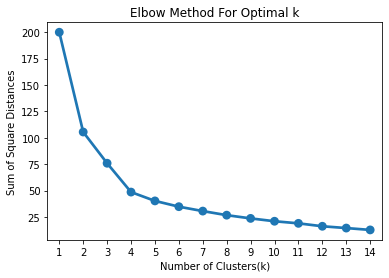

In [55]:
# Elbow method
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, random_state = 100)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plot the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Optimal number of cluster = 4**

In [56]:
# Fitting kmeans clustering algorithm
kmeans = KMeans(n_clusters=4,random_state = 100)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

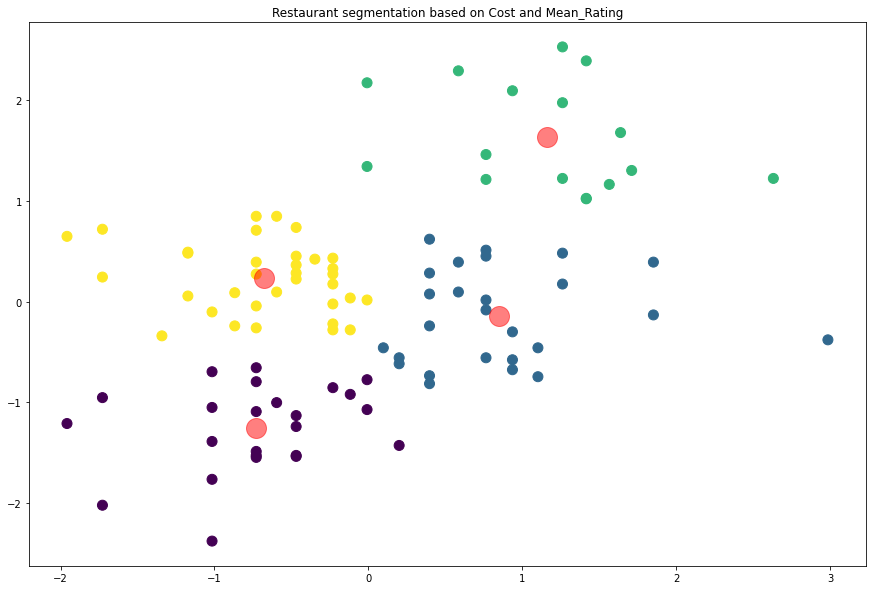

In [57]:
# Plotting the clusters
plt.figure(figsize=(15,10))
plt.title('Restaurant segmentation based on Cost and Mean_Rating')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100)

# Plotting cluster centres
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=400, alpha=0.5)
plt.show()

In [58]:
#Finding the clusters for the observation given in the dataset
final_df['Cluster'] = kmeans.labels_
final_df[['Name', 'Cost', 'Mean_Rating','Cluster']].head(10)

,Name,Cost,Mean_Rating,Cluster
0,Beyond Flavours,28.284271,4.280,2
1,Paradise,28.284271,4.700,2
2,Flechazo,36.055513,4.660,2
3,Shah Ghouse Hotel & Restaurant,28.284271,3.210,0
4,Over The Moon Brew Company,34.641016,4.340,2
5,The Fisherman's Wharf,38.729833,4.220,2
6,eat.fit,22.360680,3.200,0
7,Shah Ghouse Spl Shawarma,17.320508,3.430,3
8,Hyper Local,31.622777,3.640,1
9,Cream Stone,18.708287,3.845,3


**Dendrogram**

The sole concept of hierarchical clustering lies in just the construction and analysis of a dendrogram. A dendrogram is a tree-like structure that explains the relationship between all the data points in the system.

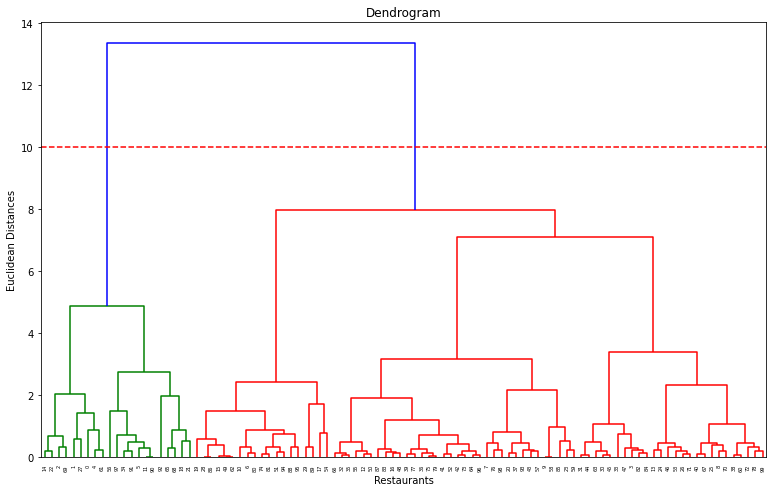

In [59]:
# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

**Optimal number of cluster = 2**

In [60]:
# Fitting hierarchical clustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

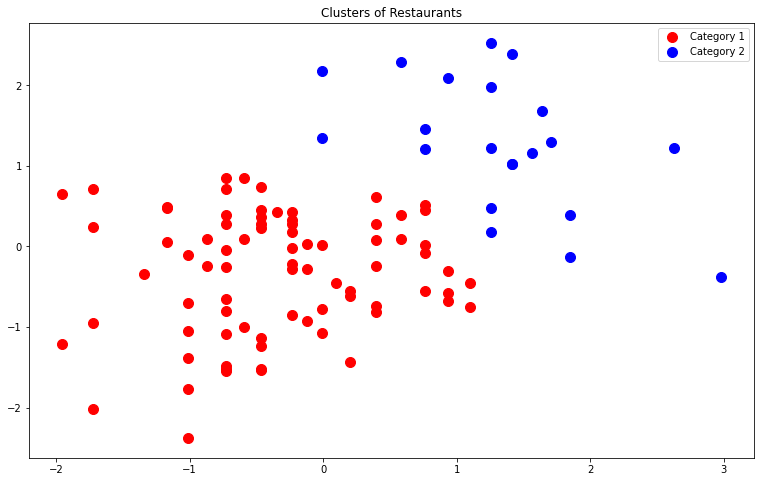

In [61]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Category 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Category 2')

plt.title('Clusters of Restaurants')
plt.legend()
plt.show()

## Clustering by 'Mean_Rating' and 'Mean_Followers' 

**Feature scaling**

In [62]:
features_rec_mon=['Mean_Rating', 'Mean_Followers']
X_features_rec_mon = final_df[features_rec_mon].values
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

**Silhouette score**

In [63]:
# Calculating silhouette score for a range of clusters
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state = 100)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.31024509943687795
For n_clusters = 3, silhouette score is 0.36060374437874054
For n_clusters = 4, silhouette score is 0.32732133161269816
For n_clusters = 5, silhouette score is 0.35781375680598354
For n_clusters = 6, silhouette score is 0.35825464982873806
For n_clusters = 7, silhouette score is 0.3655854669871221
For n_clusters = 8, silhouette score is 0.37562255333410655
For n_clusters = 9, silhouette score is 0.3875501345490009
For n_clusters = 10, silhouette score is 0.3847890936906516
For n_clusters = 11, silhouette score is 0.4083820379965876
For n_clusters = 12, silhouette score is 0.38389201309418985
For n_clusters = 13, silhouette score is 0.3875492447658804
For n_clusters = 14, silhouette score is 0.4048744733221378
For n_clusters = 15, silhouette score is 0.39966495423838616


**Optimal number of cluster = 11**

**Elbow method**

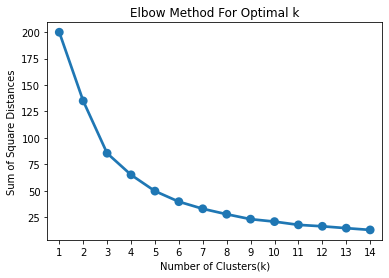

In [64]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, random_state = 100)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plotting the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Optimal number of cluster = 3**

In [65]:
# Fitting kmeans clustering algothm
kmeans = KMeans(n_clusters=3,random_state = 100)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

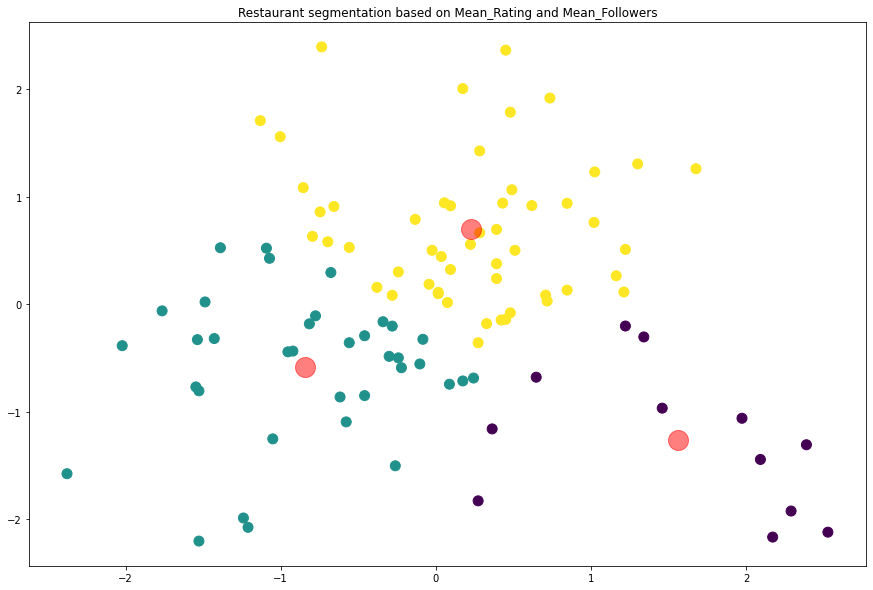

In [66]:
# Plotting the clusters
plt.figure(figsize=(15,10))
plt.title('Restaurant segmentation based on Mean_Rating and Mean_Followers')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100)

# Plotting cluster centres
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=400, alpha=0.5)
plt.show()

In [67]:
#Finding the clusters for the observation given in the dataset
final_df['Cluster'] = kmeans.labels_
final_df[['Name', 'Mean_Rating', 'Mean_Followers','Cluster']].head(10)

,Name,Mean_Rating,Mean_Followers,Cluster
0,Beyond Flavours,4.280,11.582170,0
1,Paradise,4.700,3.046157,0
2,Flechazo,4.660,6.357025,0
3,Shah Ghouse Hotel & Restaurant,3.210,12.483147,1
4,Over The Moon Brew Company,4.340,8.545223,0
5,The Fisherman's Wharf,4.220,12.048432,0
6,eat.fit,3.200,15.873679,2
7,Shah Ghouse Spl Shawarma,3.430,12.232453,1
8,Hyper Local,3.640,13.051330,2
9,Cream Stone,3.845,12.610953,2


**Dendrogram**

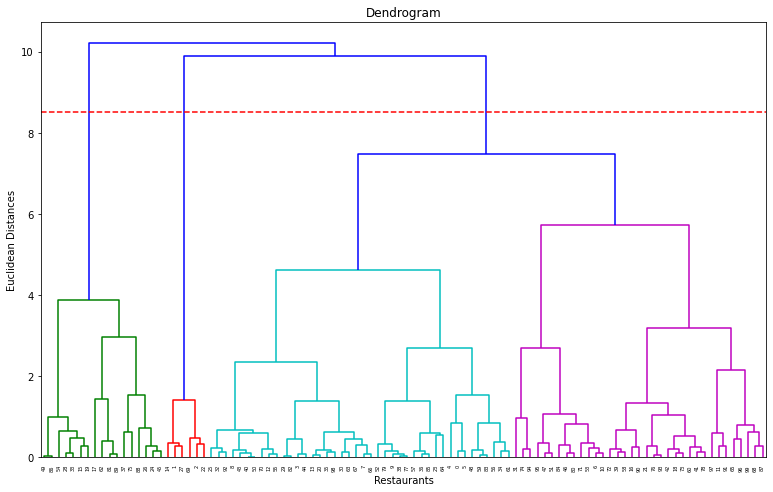

In [68]:
# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.axhline(y=8.5, color='r', linestyle='--')
plt.show()

**Optimal number of cluster = 3**

In [69]:
# Fitting hierarchical clustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

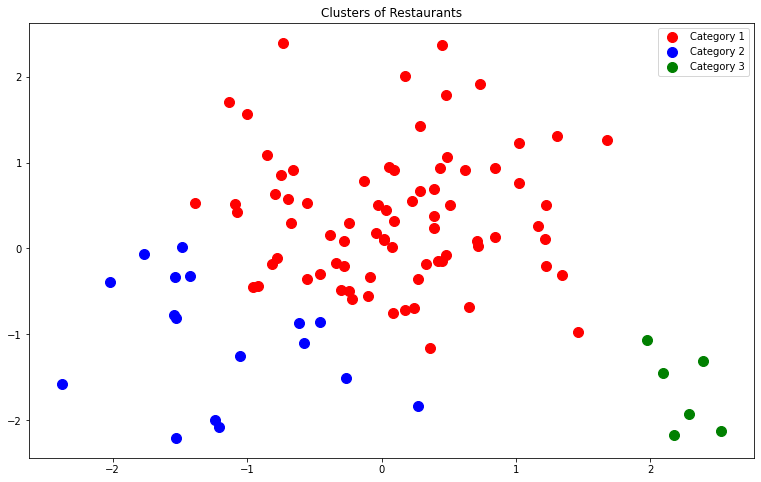

In [70]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Category 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Category 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Category 3')

plt.title('Clusters of Restaurants')
plt.legend()
plt.show()

## Clustering by 'Cost' and 'Mean_Followers' 

**Feature scaling**

In [71]:
features_rec_mon=['Cost', 'Mean_Followers']
X_features_rec_mon = final_df[features_rec_mon].values
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

**Silhouette score**

In [72]:
# Calculating silhouette score for a range of clusters
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state = 100)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.3506668897402852
For n_clusters = 3, silhouette score is 0.3401790683615185
For n_clusters = 4, silhouette score is 0.36082058166384057
For n_clusters = 5, silhouette score is 0.36206804075588606
For n_clusters = 6, silhouette score is 0.3763093393322761
For n_clusters = 7, silhouette score is 0.3693182453431297
For n_clusters = 8, silhouette score is 0.4007362170662504
For n_clusters = 9, silhouette score is 0.41398492965609557
For n_clusters = 10, silhouette score is 0.4036943647534554
For n_clusters = 11, silhouette score is 0.4000163396791544
For n_clusters = 12, silhouette score is 0.37658008020196293
For n_clusters = 13, silhouette score is 0.37662613518996807
For n_clusters = 14, silhouette score is 0.3935706288893103
For n_clusters = 15, silhouette score is 0.3838247195604271


**Optimal number of cluster = 9**

**Elbow method**

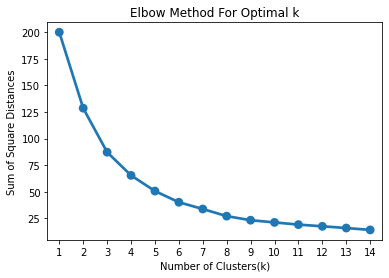

In [73]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, random_state = 100)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plotting the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Optimal number of cluster = 3**

In [74]:
# Fitting the kmeans clustering algorithm
kmeans = KMeans(n_clusters=3,random_state = 100)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

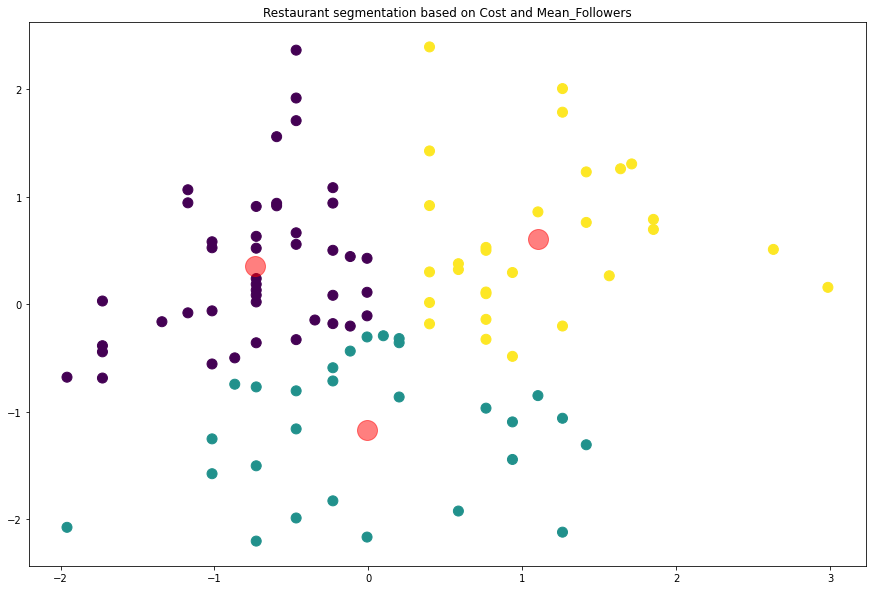

In [75]:
# Plotting the clusters
plt.figure(figsize=(15,10))
plt.title('Restaurant segmentation based on Cost and Mean_Followers')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100)

# Plotting cluster centres
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=400, alpha=0.5)
plt.show()

In [76]:
#Finding the clusters for the observation given in the dataset
final_df['Cluster'] = kmeans.labels_
final_df[['Name', 'Cost', 'Mean_Followers','Cluster']].head(10)

,Name,Cost,Mean_Followers,Cluster
0,Beyond Flavours,28.284271,11.582170,1
1,Paradise,28.284271,3.046157,1
2,Flechazo,36.055513,6.357025,1
3,Shah Ghouse Hotel & Restaurant,28.284271,12.483147,0
4,Over The Moon Brew Company,34.641016,8.545223,1
5,The Fisherman's Wharf,38.729833,12.048432,2
6,eat.fit,22.360680,15.873679,0
7,Shah Ghouse Spl Shawarma,17.320508,12.232453,0
8,Hyper Local,31.622777,13.051330,2
9,Cream Stone,18.708287,12.610953,0


**Dendrogram**

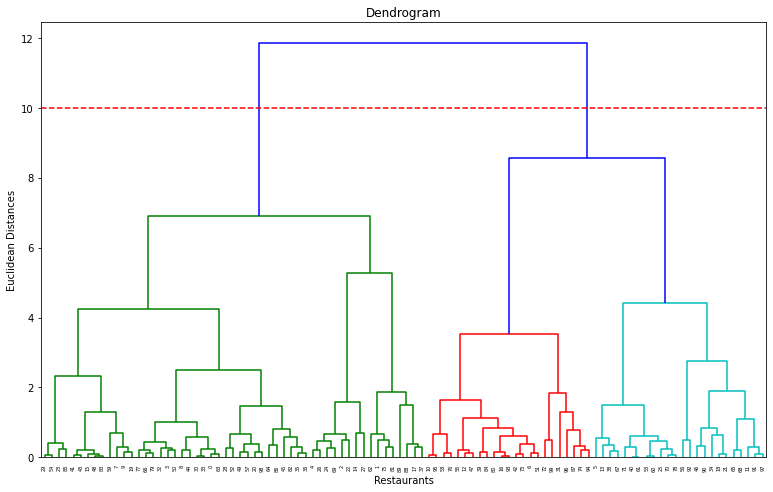

In [77]:
# Using the dendrogram to find the optimal number of clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.axhline(y=10, color='r', linestyle='--')
plt.show()

**Optimal number of cluster = 2**

In [78]:
# Fitting hierarchical clustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

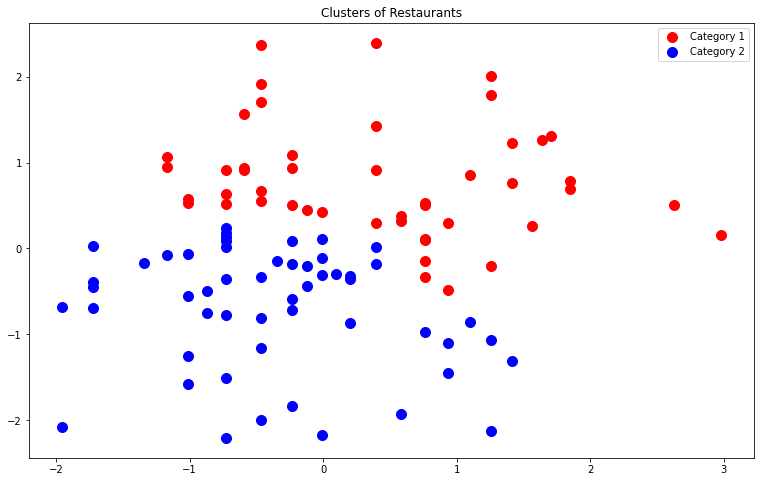

In [79]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Category 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Category 2')

plt.title('Clusters of Restaurants')
plt.legend()
plt.show()

## Clustering by 'Cost', 'Mean_Rating' and 'Mean_Followers' 

**Feature scaling**

In [80]:
features_rec_mon=['Cost', 'Mean_Rating', 'Mean_Followers']
X_features_rec_mon = final_df[features_rec_mon].values
scaler_rec_mon = preprocessing.StandardScaler()
X_rec_mon=scaler_rec_mon.fit_transform(X_features_rec_mon)
X=X_rec_mon

**Silhouette score**

In [81]:
# Calculating silhouette score for a range of clusters
range_n_clusters = [2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state = 100)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_

    score = silhouette_score(X, preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.2997565298763647
For n_clusters = 3, silhouette score is 0.3068830755721038
For n_clusters = 4, silhouette score is 0.27279277033520133
For n_clusters = 5, silhouette score is 0.28068015568935323
For n_clusters = 6, silhouette score is 0.3201014206310612
For n_clusters = 7, silhouette score is 0.3232245992976861
For n_clusters = 8, silhouette score is 0.3027729691490487
For n_clusters = 9, silhouette score is 0.2883482473915724
For n_clusters = 10, silhouette score is 0.29016741350594777
For n_clusters = 11, silhouette score is 0.2983113402293269
For n_clusters = 12, silhouette score is 0.30408207258861436
For n_clusters = 13, silhouette score is 0.2784772976241702
For n_clusters = 14, silhouette score is 0.28076939847730215
For n_clusters = 15, silhouette score is 0.29025317469291095


**Optimal number of cluster = 6**

**Elbow method**

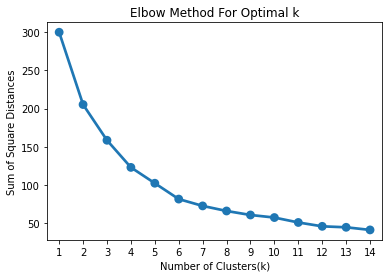

In [82]:
sum_of_sq_dist = {}
for k in range(1,15):
    km = KMeans(n_clusters= k, init= 'k-means++', max_iter= 1000, random_state = 100)
    km = km.fit(X)
    sum_of_sq_dist[k] = km.inertia_
    
#Plotting the graph for the sum of square distance values and Number of Clusters
sns.pointplot(x = list(sum_of_sq_dist.keys()), y = list(sum_of_sq_dist.values()))
plt.xlabel('Number of Clusters(k)')
plt.ylabel('Sum of Square Distances')
plt.title('Elbow Method For Optimal k')
plt.show()

**Optimal number of cluster = 4**

In [83]:
# Fitting the kmeans clustering algorithm
kmeans = KMeans(n_clusters=4,random_state = 100)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)

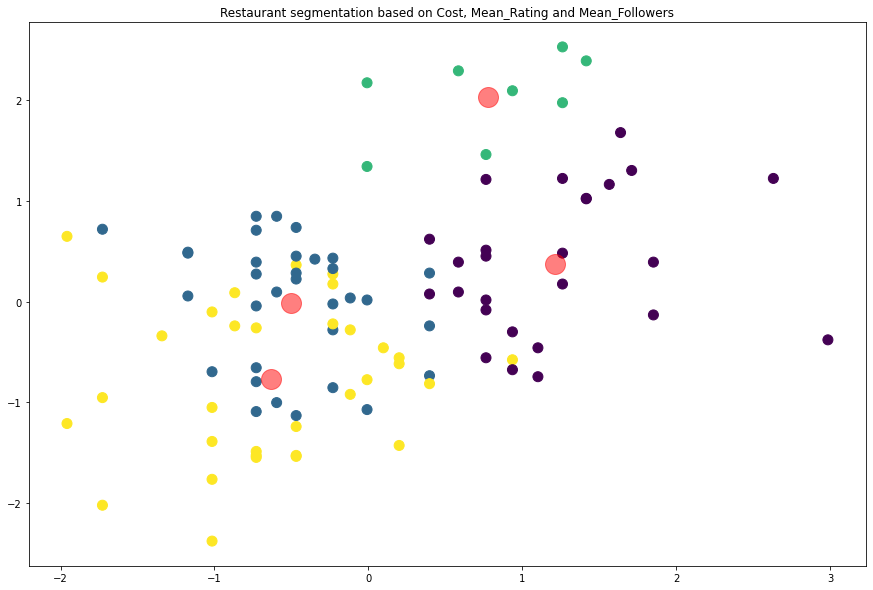

In [84]:
# plotting the clusters
plt.figure(figsize=(15,10))
plt.title('Restaurant segmentation based on Cost, Mean_Rating and Mean_Followers')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=100)

# Plotting cluster centres
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=400, alpha=0.5)
plt.show()

In [85]:
#Finding the clusters for the observation given in the dataset
final_df['Cluster'] = kmeans.labels_
final_df.head(10)

,Name,Cost,Mean_Rating,Mean_Followers,Cluster
0,Beyond Flavours,28.284271,4.280,11.582170,2
1,Paradise,28.284271,4.700,3.046157,2
2,Flechazo,36.055513,4.660,6.357025,2
3,Shah Ghouse Hotel & Restaurant,28.284271,3.210,12.483147,3
4,Over The Moon Brew Company,34.641016,4.340,8.545223,2
5,The Fisherman's Wharf,38.729833,4.220,12.048432,0
6,eat.fit,22.360680,3.200,15.873679,1
7,Shah Ghouse Spl Shawarma,17.320508,3.430,12.232453,3
8,Hyper Local,31.622777,3.640,13.051330,0
9,Cream Stone,18.708287,3.845,12.610953,1


**Dendrogram**

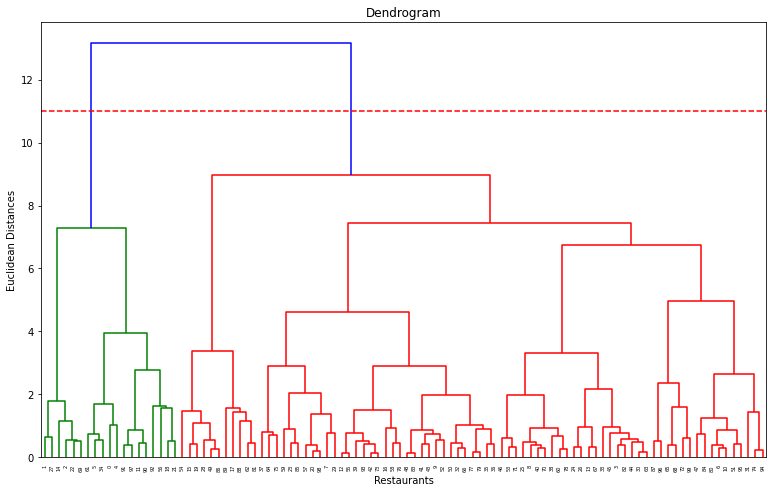

In [86]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize=(13,8))
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Restaurants')
plt.ylabel('Euclidean Distances')
plt.axhline(y=11, color='r', linestyle='--')
plt.show()

**Optimal number of cluster = 2**

In [87]:
# Fitting hierarchical clustering
hc = AgglomerativeClustering(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

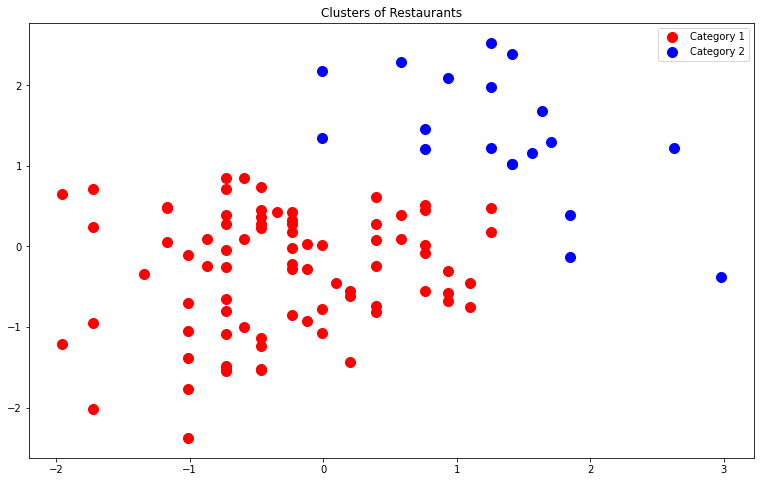

In [88]:
# Visualizing the clusters (two dimensions only)
plt.figure(figsize=(13,8))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Category 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Category 2')

plt.title('Clusters of Restaurants')
plt.legend()
plt.show()

## Summary

In [89]:
# Specify the Column Names while initializing the Table 
myTable = PrettyTable(['SL No.',"Model_Name",'Data', "Optimal_Number_of_cluster"]) 
  
# Add rows 
myTable.add_row(['1',"K-Means with silhouette_score ", "Cost and Mean_Rating", "4"]) 
myTable.add_row(['2',"K-Means with Elbow methos  ", "Cost and Mean_Rating", "4"])
myTable.add_row(['3',"Hirarchical Clustering", "Cost and Mean_Rating", "2"]) 

myTable.add_row(['4',"K-Means with silhouette_score ", "Mean_Rating and Mean_Followers", "11"]) 
myTable.add_row(['5',"K-Means with Elbow methos  ", "Mean_Rating and Mean_Followers", "3"])
myTable.add_row(['6',"Hierarchical Clustering", "Mean_Rating and Mean_Followers", "3"])

myTable.add_row(['7',"K-Means with silhouette_score ", "Cost and Mean_Followers", "9"]) 
myTable.add_row(['8',"K-Means with Elbow methos  ", "Cost and Mean_Followers", "3"])
myTable.add_row(['9',"Hierarchical clustering  ", "Cost and Mean_Followers", "2"])

myTable.add_row(['10',"K-Means with silhouette_score ", "Cost, Mean_Rating and Mean_Followers", "6"]) 
myTable.add_row(['11',"K-Means with Elbow methos  ", "Cost, Mean_Rating and Mean_Followers", "4"])
myTable.add_row(['12',"Hierarchical clustering  ", "Cost, Mean_Rating and Mean_Followers", "2"])

print(myTable)

+--------+--------------------------------+--------------------------------------+---------------------------+
| SL No. |           Model_Name           |                 Data                 | Optimal_Number_of_cluster |
+--------+--------------------------------+--------------------------------------+---------------------------+
|   1    | K-Means with silhouette_score  |         Cost and Mean_Rating         |             4             |
|   2    |  K-Means with Elbow methos     |         Cost and Mean_Rating         |             4             |
|   3    |     Hirarchical Clustering     |         Cost and Mean_Rating         |             2             |
|   4    | K-Means with silhouette_score  |    Mean_Rating and Mean_Followers    |             11            |
|   5    |  K-Means with Elbow methos     |    Mean_Rating and Mean_Followers    |             3             |
|   6    |    Hierarchical Clustering     |    Mean_Rating and Mean_Followers    |             3             |
|

# **Sentiment Analysis**

## Data preprocessing and EDA

In [90]:
nlp_df = df2[['Name', 'Review', 'Rating']]

In [91]:
nlp_df.head()

,Name,Review,Rating
0,Beyond Flavours,"The ambience was good, food was quite good . h...",5.0
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,5.0
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,5.0
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,5.0
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,5.0


In [92]:
nlp_df['Rating'] = np.where(nlp_df['Rating']<4, 0, 1)

In [93]:
nlp_df.head()

,Name,Review,Rating
0,Beyond Flavours,"The ambience was good, food was quite good . h...",1
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,1
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,1
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,1
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,1


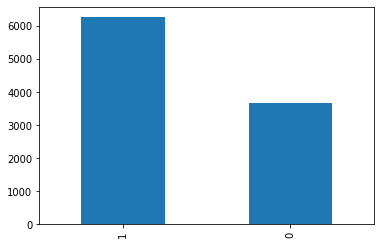

In [94]:
nlp_df['Rating'].value_counts().plot.bar()
plt.show()

**Restaurants with most number of positive reviews:**

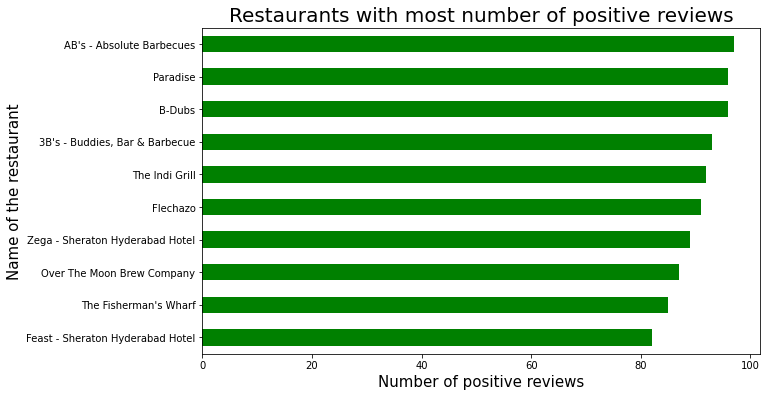

In [95]:
# Restaurant with most number of positive reviews
plt.figure(figsize=(10,6))
nlp_df[nlp_df['Rating']==1]['Name'].value_counts()[:10].plot.barh(color = 'g')
plt.title("Restaurants with most number of positive reviews", fontsize=20)
plt.xlabel("Number of positive reviews", fontsize=15)
plt.ylabel("Name of the restaurant", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

**Restaurants with most number of negative reviews:**

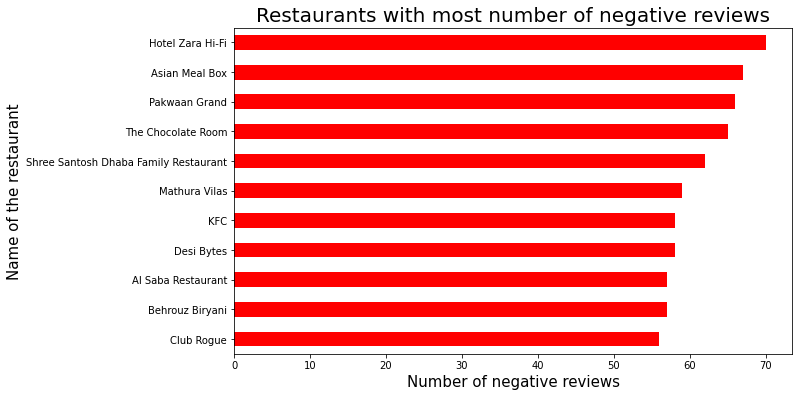

In [96]:
# Restaurant with most number of negative reviews
plt.figure(figsize=(10,6))
nlp_df[nlp_df['Rating']==0]['Name'].value_counts()[:11].plot.barh(color = 'r')
plt.title("Restaurants with most number of negative reviews", fontsize=20)
plt.xlabel("Number of negative reviews", fontsize=15)
plt.ylabel("Name of the restaurant", fontsize=15)
plt.gca().invert_yaxis()
plt.show()

In [97]:
nlp_df.head()

,Name,Review,Rating
0,Beyond Flavours,"The ambience was good, food was quite good . h...",1
1,Beyond Flavours,Ambience is too good for a pleasant evening. S...,1
2,Beyond Flavours,A must try.. great food great ambience. Thnx f...,1
3,Beyond Flavours,Soumen das and Arun was a great guy. Only beca...,1
4,Beyond Flavours,Food is good.we ordered Kodi drumsticks and ba...,1


In [98]:
nlp_df["Review"] = nlp_df["Review"].str.lower()

## Removing stopwords and punctuations

Stop words are available in abundance in any human language. By removing these words, we remove the low-level information from our text in order to give more focus to the important information.

In [99]:
# Downloading stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [100]:
# Creating a function to remove stopwords and punctations from 'Review' column

def text_process(msg):
    nopunc =[char for char in msg if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return ' '.join([word for word in nopunc.split() if word.lower() not in stopwords.words('english')])

In [101]:
# Applying text_process function to "Review" column and storing the changes in a new column
nlp_df['Filtered_Review'] = nlp_df['Review'].apply(text_process)

In [102]:
print(nlp_df['Review'][0])
print(nlp_df['Filtered_Review'][0])

the ambience was good, food was quite good . had saturday lunch , which was cost effective .
good place for a sate brunch. one can also chill with friends and or parents.
waiter soumen das was really courteous and helpful.
ambience good food quite good saturday lunch cost effective good place sate brunch one also chill friends parents waiter soumen das really courteous helpful


## Stemming

Stemming is a method of normalization of words in Natural Language Processing. It is a technique in which a set of words in a sentence are converted into a sequence to shorten its lookup. In this method, the words having the same meaning but have some variations according to the context or sentence are normalized.

In another word, there is one root word, but there are many variations of the same words. For example, the root word is “eat” and it’s variations are “eats, eating, eaten and like so”. In the same way, with the help of Stemming in Python, we can find the root word of any variations.

In [103]:
# creating an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):
  '''a function which stems each word in the given text'''
  text = [stemmer.stem(word) for word in text.split()]
  return " ".join(text)

In [104]:
# Applying stemming function to the column
nlp_df['Filtered_Review'] = nlp_df['Filtered_Review'].apply(stemming)

## Vectorization

Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support.

In Machine Learning, vectorization is a step in feature extraction. The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

In [105]:
# Creating an object of TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=500)
# Vectorizing The column
X = vectorizer.fit_transform(nlp_df['Filtered_Review'])

In [106]:
# Name of the features
print(vectorizer.get_feature_names())

['10', '35', '355', '45', '55', 'absolut', 'actual', 'ad', 'add', 'almost', 'along', 'aloo', 'also', 'although', 'alway', 'amaz', 'ambianc', 'ambienc', 'amount', 'anoth', 'anyth', 'area', 'around', 'arrang', 'ask', 'attent', 'authent', 'avail', 'averag', 'away', 'awesom', 'back', 'bad', 'bake', 'bakeri', 'bar', 'base', 'beauti', 'beer', 'best', 'better', 'big', 'bill', 'biriyani', 'birthday', 'biryani', 'bit', 'book', 'bowl', 'box', 'bread', 'breakfast', 'browni', 'buffet', 'burger', 'busi', 'butter', 'cafe', 'cake', 'call', 'came', 'cant', 'care', 'chang', 'charg', 'check', 'chees', 'chef', 'chicken', 'chill', 'chilli', 'chines', 'chocol', 'choic', 'choos', 'chutney', 'citi', 'close', 'cocktail', 'coffe', 'cold', 'combo', 'come', 'comfort', 'compar', 'complet', 'cook', 'cool', 'corn', 'cost', 'could', 'couldnt', 'counter', 'coupl', 'cours', 'courteous', 'crave', 'cream', 'crispi', 'crowd', 'cuisin', 'curri', 'custom', 'dal', 'danc', 'date', 'day', 'decent', 'decor', 'definit', 'delici

In [107]:
X.toarray().shape

(9955, 500)

## Train test split

In [108]:
review_train,review_test,label_train,label_test = train_test_split(nlp_df['Filtered_Review'], nlp_df['Rating'],test_size=0.20, random_state = 100)

In [109]:
review_train.head()

9744    amaz place food amaz love bartend sai amaz lov...
75      place dinner day back ambienc good restaur alm...
818     nice cozi place good ambienc food also great s...
1849    went collegu lunchgood food great ambienc staf...
8832                                  absolut good awesom
Name: Filtered_Review, dtype: object

With reviews represented as vectors, we can finally train our sentiment analysis classifier. Now we will use Naive Bayes Classifier to perform this classification task

In [110]:
train_vectorized = vectorizer.transform(review_train)
test_vectorized = vectorizer.transform(review_test)

In [111]:
train_vectorized

<7964x500 sparse matrix of type '<class 'numpy.float64'>'
	with 126442 stored elements in Compressed Sparse Row format>

In [112]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

## Naive Bayes Classifier

In [155]:
# Instantiating naive bayes classifier
nb_clf = GaussianNB()

In [156]:
# Training the model
nb_clf.fit(train_array,label_train)

GaussianNB()

In [157]:
# Predictions
train_preds = nb_clf.predict(train_array)
test_preds = nb_clf.predict(test_array)

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      2962
           1       0.88      0.86      0.87      5002

    accuracy                           0.84      7964
   macro avg       0.83      0.83      0.83      7964
weighted avg       0.84      0.84      0.84      7964

              precision    recall  f1-score   support

           0       0.76      0.77      0.77       724
           1       0.87      0.86      0.87      1267

    accuracy                           0.83      1991
   macro avg       0.82      0.82      0.82      1991
weighted avg       0.83      0.83      0.83      1991



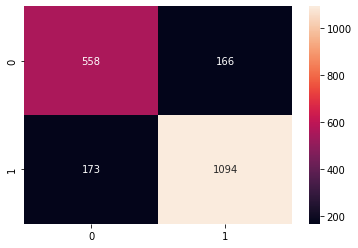

In [158]:
# Print the classification report for train and test
print(classification_report(label_train,train_preds))
print(classification_report(label_test,test_preds))

# Confusion matrix
sns.heatmap(confusion_matrix(label_test, test_preds), annot=True, fmt='d')
plt.show()

## Logistic regression

In [159]:
# Instantiating logistic regression classifier
lr_clf = LogisticRegression(max_iter=1000)

In [160]:
# Training the model
lr_clf.fit(train_array,label_train)

LogisticRegression(max_iter=1000)

In [161]:
# Getting the predicted classes
lr_train_class_preds = lr_clf.predict(train_array)
lr_test_class_preds = lr_clf.predict(test_array)

              precision    recall  f1-score   support

           0       0.86      0.80      0.83      2962
           1       0.89      0.92      0.91      5002

    accuracy                           0.88      7964
   macro avg       0.88      0.86      0.87      7964
weighted avg       0.88      0.88      0.88      7964

              precision    recall  f1-score   support

           0       0.84      0.78      0.81       724
           1       0.88      0.91      0.90      1267

    accuracy                           0.86      1991
   macro avg       0.86      0.85      0.85      1991
weighted avg       0.86      0.86      0.86      1991



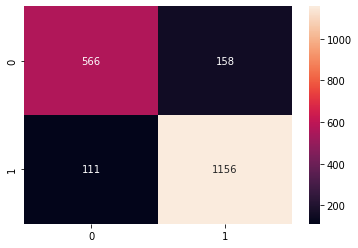

In [162]:
# Classification report
print(classification_report(label_train, lr_train_class_preds))
print(classification_report(label_test, lr_test_class_preds))

# Confusion matrix
sns.heatmap(confusion_matrix(label_test, lr_test_class_preds), annot=True, fmt='d')
plt.show()

## XGBoost

In [163]:
# Instantiating XGBoost classifier
xgb_clf = xgb.XGBClassifier(random_state=20)

In [164]:
# Training the model
xgb_clf.fit(train_array,label_train)

XGBClassifier(random_state=20)

In [165]:
# Getting the predicted classes
xgb_train_preds = xgb_clf.predict(train_array)
xgb_test_preds = xgb_clf.predict(test_array)

              precision    recall  f1-score   support

           0       0.84      0.77      0.80      2962
           1       0.87      0.92      0.89      5002

    accuracy                           0.86      7964
   macro avg       0.86      0.84      0.85      7964
weighted avg       0.86      0.86      0.86      7964

              precision    recall  f1-score   support

           0       0.80      0.74      0.77       724
           1       0.86      0.90      0.88      1267

    accuracy                           0.84      1991
   macro avg       0.83      0.82      0.82      1991
weighted avg       0.84      0.84      0.84      1991



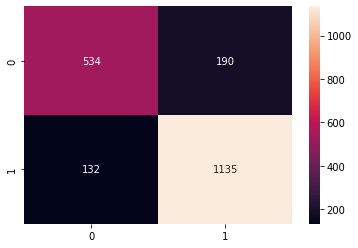

In [166]:
# Classification report
print (classification_report(label_train, xgb_train_preds))
print (classification_report(label_test, xgb_test_preds))

# Confusion matrix
sns.heatmap(confusion_matrix(label_test, xgb_test_preds), annot=True, fmt='d')
plt.show()

## SVM

In [167]:
# Instantiating SVM classifier
svm_clf = svm.SVC(kernel = 'rbf', C = 0.5)

In [168]:
# Training the model 
svm_clf.fit(train_array, label_train)

SVC(C=0.5)

In [169]:
# Getting the predicted classes
svm_train_preds = svm_clf.predict(train_array)
svm_test_preds = svm_clf.predict(test_array)

              precision    recall  f1-score   support

           0       0.93      0.86      0.89      2962
           1       0.92      0.96      0.94      5002

    accuracy                           0.92      7964
   macro avg       0.93      0.91      0.92      7964
weighted avg       0.92      0.92      0.92      7964

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       724
           1       0.87      0.93      0.90      1267

    accuracy                           0.87      1991
   macro avg       0.87      0.85      0.85      1991
weighted avg       0.87      0.87      0.87      1991



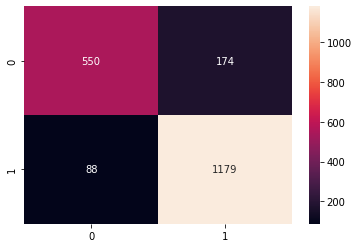

In [170]:
# Classification report
print (classification_report(label_train, svm_train_preds))
print (classification_report(label_test, svm_test_preds))

# Confusion matrix
sns.heatmap(confusion_matrix(label_test, svm_test_preds), annot=True, fmt='d')
plt.show()